# Linear Regression Assignment
---

## BoomBikes - A Bike Sharing Case Study

### Problem Statement:
BoomBikes, a US-based bike-sharing provider, is facing significant revenue challenges due to the COVID-19 pandemic. To prepare for post-pandemic recovery and gain a competitive edge, the company aims to develop a data-driven strategy to understand and predict the demand for shared bikes in the American market.

The primary objectives of this analysis are:
1. Identify the key factors influencing bike-sharing demand in the post-COVID scenario.
2. Develop a predictive model to accurately estimate daily bike rental demand.
3. Quantify the impact of various variables on bike-sharing usage.
4. Provide actionable insights to help BoomBikes optimize their operations and marketing strategies.

Using a comprehensive dataset that includes daily bike demand data, meteorological information, and other relevant factors, we will:
1. Conduct exploratory data analysis to understand patterns and relationships in the data.
2. Build a multiple linear regression model to predict bike-sharing demand.
3. Determine which variables are most significant in predicting demand.
4. Evaluate how well these variables explain the variations in bike demand.
5. Provide recommendations for BoomBikes to effectively meet customer needs and maximize revenue in the post-pandemic market.

This analysis will enable BoomBikes to:
- Anticipate and meet fluctuating customer demand efficiently.
- Allocate resources optimally across their service areas.
- Develop targeted marketing strategies based on key demand drivers.
- Make informed decisions about fleet management and expansion plans.
  
By leveraging data-driven insights, BoomBikes aims to position itself as a market leader in the bike-sharing industry, capitalizing on the expected surge in demand as lockdown restrictions ease and the economy recovers.

# Step 1: Reading and Understanding the Data.

In [4]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [131]:
# import required libraries.

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [133]:
# Display all the columns of dataframe.

pd.set_option('display.max_columns', None)

In [135]:
# Analyse the data

df_bike_sharing_raw = pd.read_csv('day.csv')
df_bike_sharing_raw.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**Inspect the various aspects of the dataframe.**

In [138]:
df_bike_sharing_raw.shape

(730, 16)

In [140]:
df_bike_sharing_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [142]:
df_bike_sharing_raw.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [144]:
# Convert Date to proper format.

df_bike_sharing_raw['dteday'] = pd.to_datetime(df_bike_sharing_raw['dteday'], format='%d-%m-%Y')

In [146]:
# Check for null values.

df_bike_sharing_raw.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

---
## Based on analysing data, the following columns can be dropped for further analysis :
- `instant: record index`
  - we already have a default index
- `registered: count of registered users`
  - Since our objective is to find the total count ('cnt') of bikes and not by specific category, we will ignore this column for now.
- `casual: count of casual users`
  - Since our objective is to find the total count ('cnt') of bikes and not by specific category, we will ignore this column for now.
- `dteday : date`
  - Since we already have month and year, this date seems to be redundant.

In [149]:
df_bike_sharing_raw.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [151]:
# Removing unwanted columns 

df_bike_sharing_clean = df_bike_sharing_raw[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]

### Checking correlation.

In [154]:
df_bike_sharing_clean.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


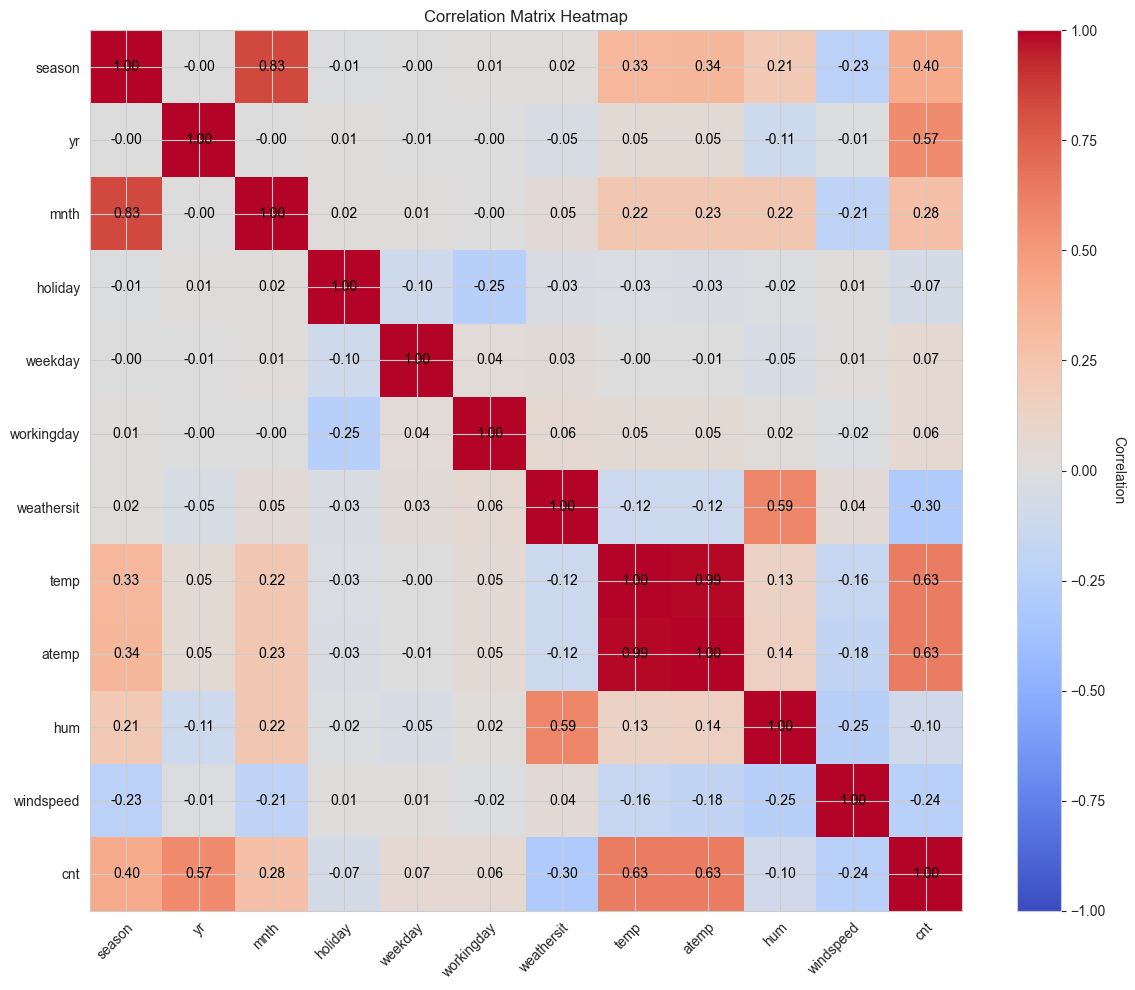

In [156]:
# plt.figure(figsize=(20, 12))
# sns.heatmap(df_bike_sharing_clean.corr(), cmap='OrRd', annot=True, fmt="0.1f")
# plt.title('Correlation between variables in the dataset')
# plt.show()

# Compute the correlation matrix
corr_matrix = df_bike_sharing_clean.corr()
 
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 10))
 
# Create the heatmap
im = ax.imshow(corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
 
# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Correlation", rotation=-90, va="bottom")
 
# Set ticks and labels
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns)
ax.set_yticklabels(corr_matrix.columns)
 
# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
 
# Loop over data dimensions and create text annotations
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = ax.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}",
                       ha="center", va="center", color="black")
 
# Set title
ax.set_title("Correlation Matrix Heatmap")
 
# Adjust layout and display
fig.tight_layout()
plt.show()

### Insights
- `cnt` seems to have very good co-relation with `temp` and `atemp`.


---

# Step 2: Visualizing the data.

In [159]:
df_bike_sharing_clean.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [162]:
numerical_variables = ['temp', 'atemp', 'hum', 'windspeed']
categorical_variables = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

### Visualising Numeric Variables : Using Pairplot
#### `For variables ['temp', 'atemp', 'hum', 'windspeed'] against 'cnt'`

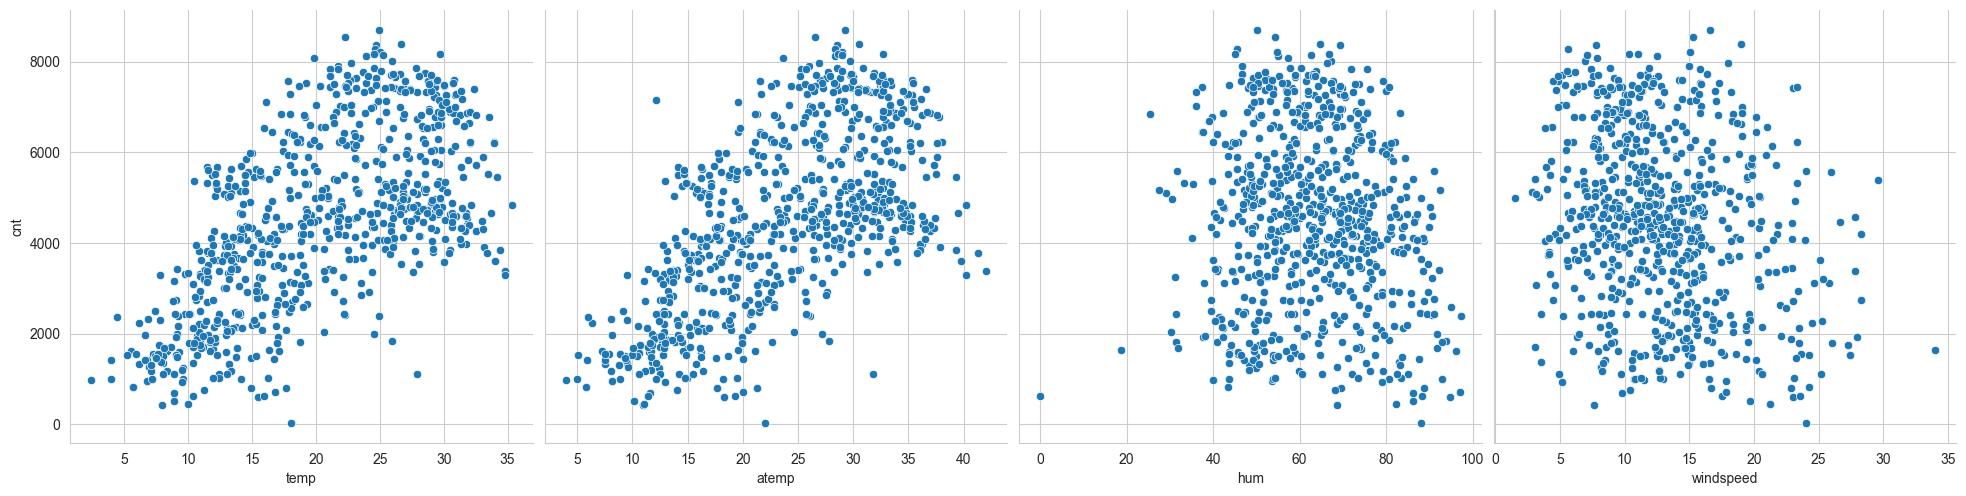

In [165]:
# Creating scatter plot of continuous variables ['temp', 'hum', 'windspeed'] vs 'cnt'

sns.set_style('whitegrid')
sns.pairplot(data=df_bike_sharing_clean, x_vars=numerical_variables, y_vars='cnt', kind='scatter', height=5, aspect=1)
plt.show()

### Insights :
- The number of rentals seems to be incresing with `temp` and `atemp`.
- `temp` and `atemp` have similar trends.

In [167]:
# Dropping atemp
df_bike_sharing_clean.drop('atemp',axis=1,inplace=True)
df_bike_sharing_clean.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


---

### Visualising Categorical Variables : Using Boxplot
#### `For variables ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'] against 'cnt'`

- `season` : season (1: Spring, 2: Summer, 3: Fall, 4: Winter)
- `yr` : year (0: 2018, 1: 2019)
- `mnth` : month ( 1 to 12) represents the month (January to December)
- `holiday`: holiday (0: Non-holiday, 1: Holiday)
- `weekday : day of the week`
    - 0: Sunday,
    - 1: Monday,
    - 2: Tuesday,
    - 3: Wednesday,
    - 4: Thursday,
    - 5: Friday,
    - 6: Saturday
- `workingday` : if day is neither weekend nor holiday is 1, otherwise is 0.
    - 0: Non-working day (weekend or holiday)
    - 1: Working day
- `weathersit` : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [172]:
# Replacing numbers with labels :
season_labels = {
    1: 'Spring', 
    2: 'Summer', 
    3: 'Fall', 
    4: 'Winter'
}

mnth_labels = {
    1 : 'JAN',
    2 : 'FEB',
    3 : 'MAR',
    4 : 'APR',
    5 : 'MAY',
    6 : 'JUN',
    7 : 'JUL',
    8 : 'AUG',
    9 : 'SEP',
    10 : 'OCT',
    11 : 'NOV',
    12 : 'DEC'
}

weekday_labels = { 
    0 : 'SUN',
    1 : 'MON',
    2 : 'TUE',
    3 : 'WED',
    4 : 'THU',
    5 : 'FRI',
    6 : 'SAT'
}

weathersit_labels = {
    1 : 'Clear',
    2 : 'Mist',
    3 : 'Light Rain/Snow',
    4 : 'Heavy Rain/Snow'
}

# Replacing numbers with actual values
df_bike_sharing_clean['season'] = df_bike_sharing_clean['season'].replace(season_labels)
df_bike_sharing_clean['mnth'] = df_bike_sharing_clean['mnth'].replace(mnth_labels)
df_bike_sharing_clean['weekday'] = df_bike_sharing_clean['weekday'].replace(weekday_labels)
df_bike_sharing_clean['weathersit'] = df_bike_sharing_clean['weathersit'].replace(weathersit_labels)

df_bike_sharing_clean.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,JAN,0,SAT,0,Mist,14.110847,80.5833,10.749882,985
1,Spring,0,JAN,0,SUN,0,Mist,14.902598,69.6087,16.652113,801
2,Spring,0,JAN,0,MON,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,JAN,0,TUE,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,JAN,0,WED,1,Clear,9.305237,43.6957,12.522300,1600


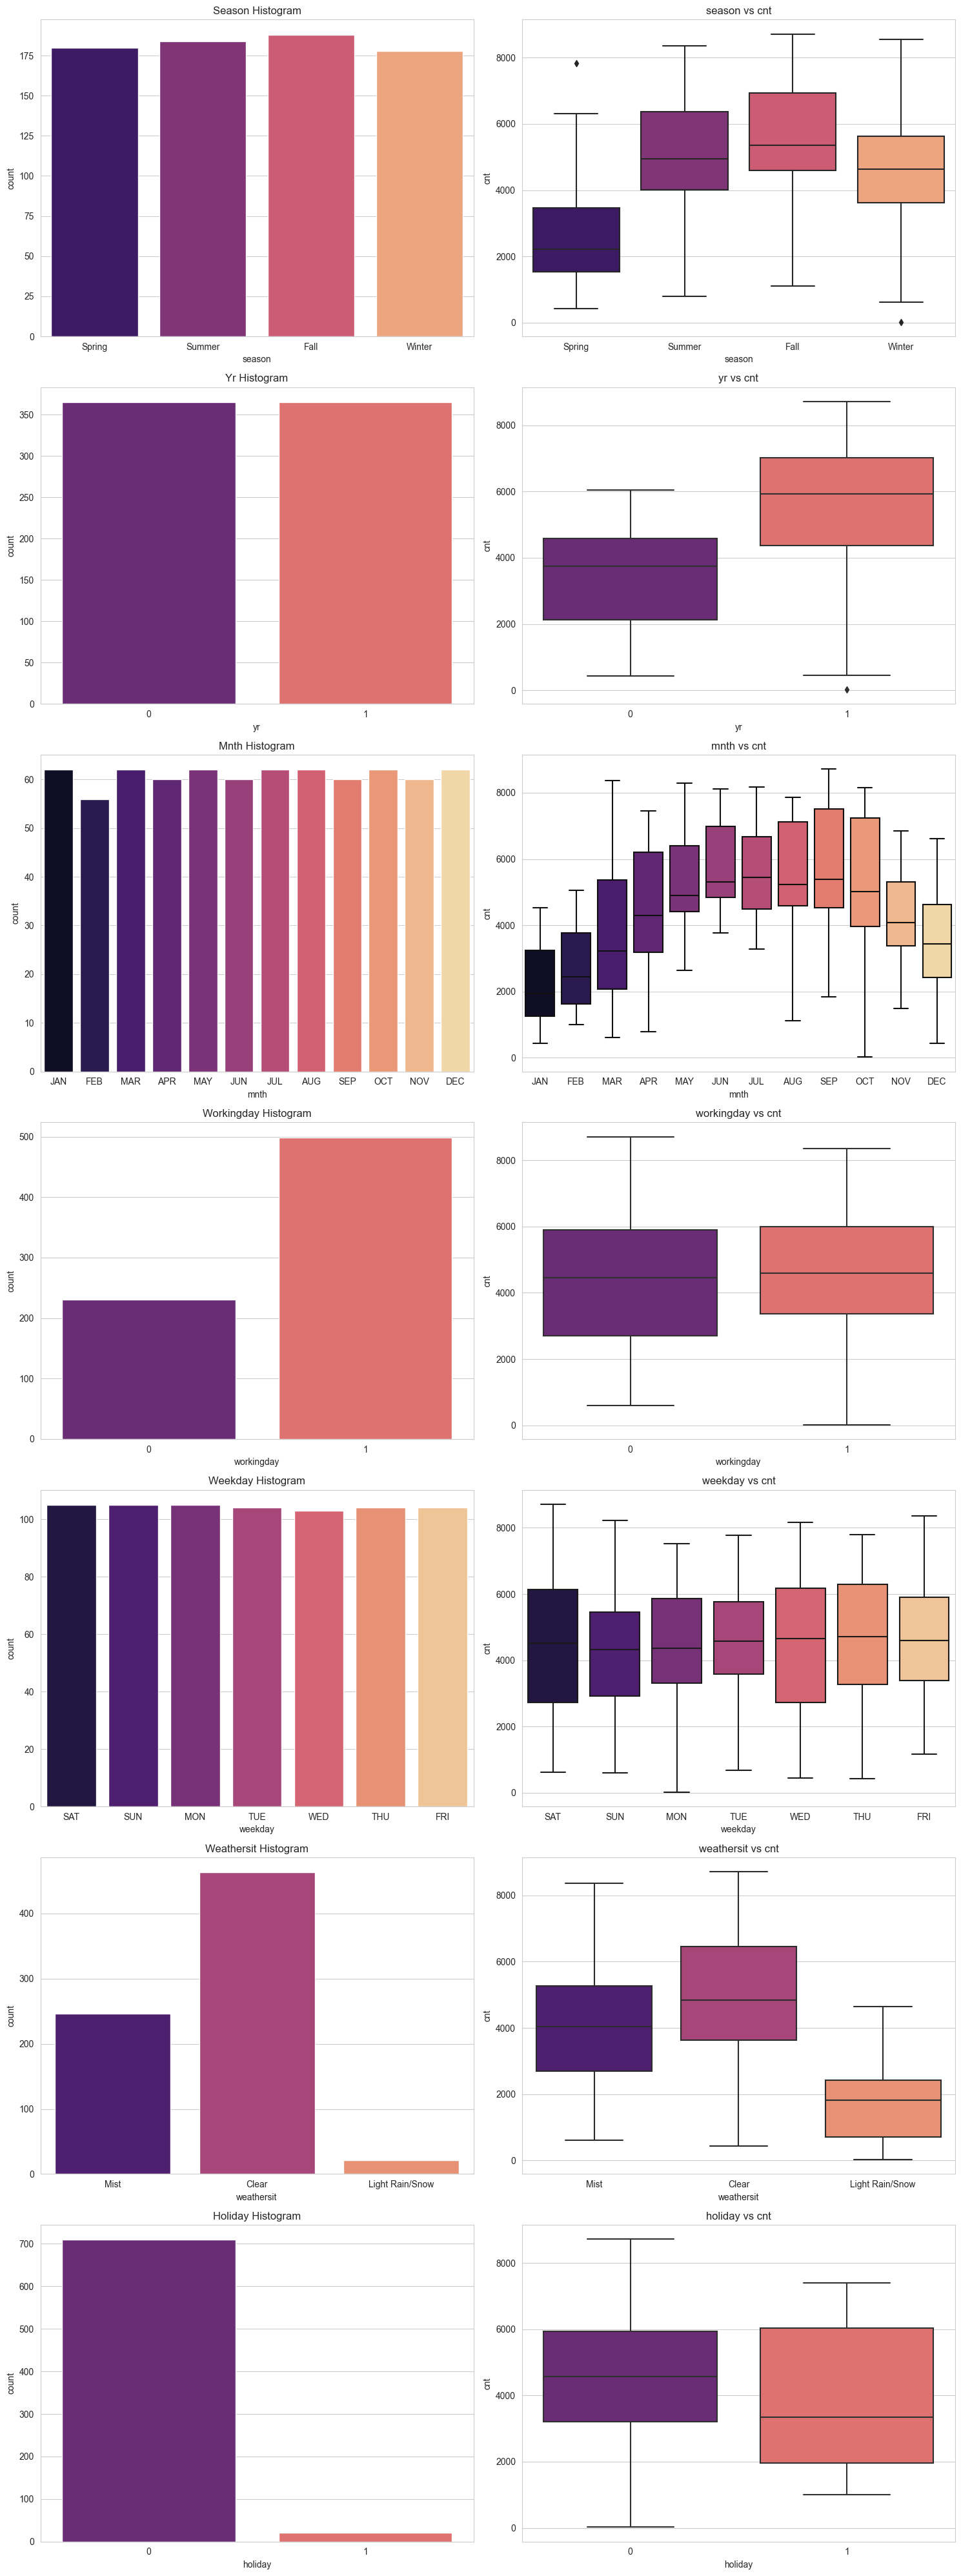

In [174]:
# Creating count plot and box plot of categorical variables ['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit'] vs 'cnt'

def plot_count(x, fig):
    plt.subplot(7, 2, fig)
    plt.title(x.capitalize() + ' Histogram')
    sns.countplot(data=df_bike_sharing_clean, x=x, palette="magma")
    plt.subplot(7, 2, (fig + 1))
    plt.title(x + ' vs cnt')
    sns.boxplot(data=df_bike_sharing_clean, x=x, y='cnt', palette="magma")

plt.figure(figsize=(15, 40))

plot_count('season', 1)
plot_count('yr', 3)
plot_count('mnth', 5)
plot_count('workingday', 7)
plot_count('weekday', 9)
plot_count('weathersit',11)
plot_count('holiday',13)

plt.tight_layout()
plt.show()

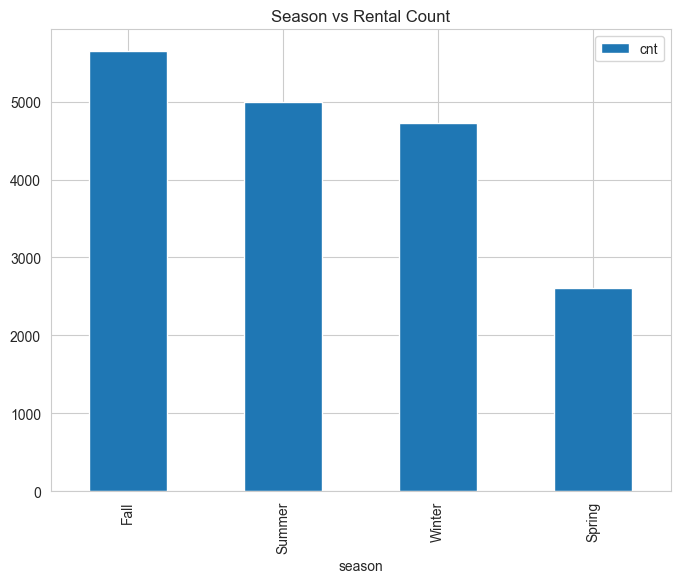

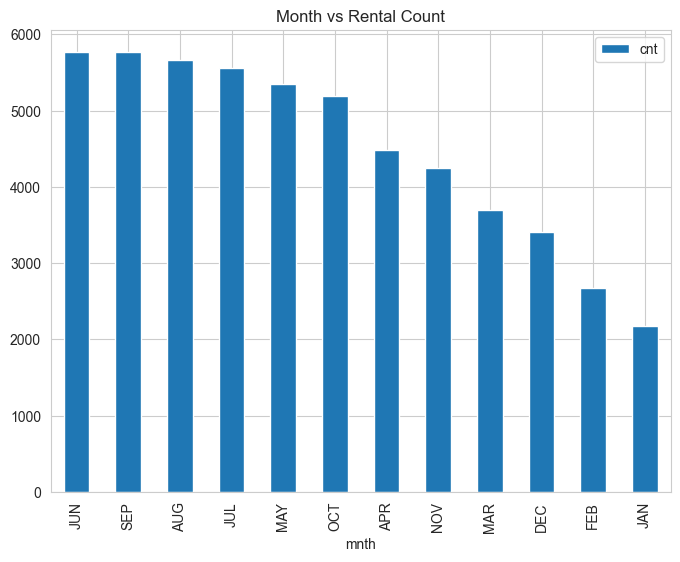

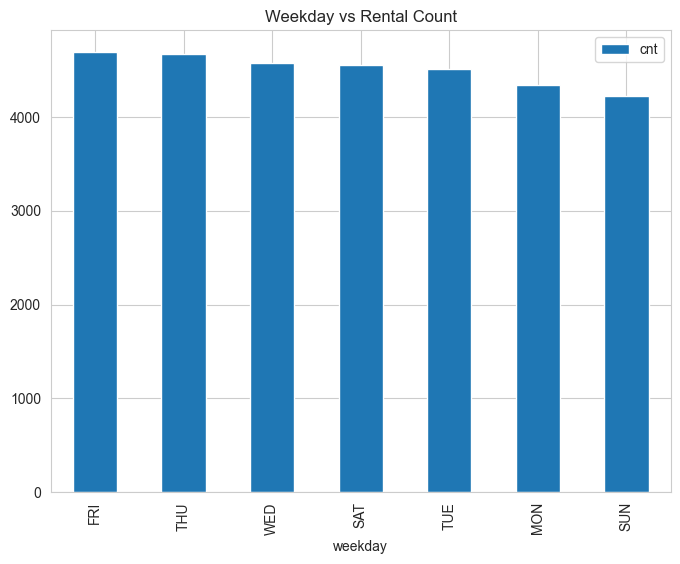

In [175]:
# Creating bar plot for ['mnth', 'weekday', 'season'] vs 'cnt' for getting clearer understanding.

bikeSharingDf = pd.DataFrame(df_bike_sharing_clean.groupby(['season'])['cnt'].mean(numeric_only=True).sort_values(ascending = False))
bikeSharingDf.plot.bar(figsize=(8,6))
plt.title('Season vs Rental Count')
plt.show()

bikeSharingDf = pd.DataFrame(df_bike_sharing_clean.groupby(['mnth'])['cnt'].mean(numeric_only=True).sort_values(ascending = False))
bikeSharingDf.plot.bar(figsize=(8,6))
plt.title('Month vs Rental Count')
plt.show()

bikeSharingDf = pd.DataFrame(df_bike_sharing_clean.groupby(['weekday'])['cnt'].mean(numeric_only=True).sort_values(ascending = False))
bikeSharingDf.plot.bar(figsize=(8,6))
plt.title('Weekday vs Rental Count')
plt.show()

### Insights:
1. We can clearly see that bike rental is more in `fall`.
2. In the year `2019` more bike was rented as compared to 2018.
3. `June` followed by `September` has highest rentals. Rentals seems to be more between `June` to `September`.
4. Bike rental seems to be higher on `non-holidays`. This may indicate that people prefer other forms of transportation or are less likely to
commute on holidays, hence the drop in demand.
5. The count of rentals is almost even throughout the week.
6. Bike rentals seems to be more on working days compared to non working days.
7. There are more rentals when the weather is `clear or less cloudy`, and no rentals when there is heavy rain or snow or weather is bad.

---

# Step 3: Data Preparation

### Dummy Variables / Dummification

In [180]:
# creating indicator variable columns
season_indicators = pd.get_dummies(df_bike_sharing_clean['season'],drop_first=True,dtype=int)
mnth_indicators = pd.get_dummies(df_bike_sharing_clean['mnth'],drop_first=True,dtype=int)
weekday_indicators = pd.get_dummies(df_bike_sharing_clean['weekday'],drop_first=True,dtype=int)
weathersit_indicators = pd.get_dummies(df_bike_sharing_clean['weathersit'],drop_first=True,dtype=int)

# adding indicator variable columns to the dataset and dropping original columns
bikeSharingData_lr = pd.concat([df_bike_sharing_clean, season_indicators, mnth_indicators, weekday_indicators, weathersit_indicators], axis=1)
bikeSharingData_lr = bikeSharingData_lr.drop(columns=['season', 'mnth', 'weekday', 'weathersit'])

# Other shortcut way to do the same - ignoring it for better naming of columns
# bikeSharingData_lr = pd.get_dummies(df_bike_sharing_clean, columns=categorical_variables, drop_first=True, dtype=int)

bikeSharingData_lr.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,AUG,DEC,FEB,JAN,JUL,JUN,MAR,MAY,NOV,OCT,SEP,MON,SAT,SUN,THU,TUE,WED,Light Rain/Snow,Mist
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [183]:
# Checking shape of dataframe after introducing Dummy variables.

print(bikeSharingData_lr.shape)
print(bikeSharingData_lr.columns)

(730, 29)
Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'Spring', 'Summer', 'Winter', 'AUG', 'DEC', 'FEB', 'JAN', 'JUL', 'JUN',
       'MAR', 'MAY', 'NOV', 'OCT', 'SEP', 'MON', 'SAT', 'SUN', 'THU', 'TUE',
       'WED', 'Light Rain/Snow', 'Mist'],
      dtype='object')


# Step 4: Splitting the data

In [186]:
# Specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikeSharingData_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

In [188]:
# Check whether the split is proper.
print(df_train.shape, str(df_train.shape[0]/bikeSharingData_lr.shape[0] * 100) + '%')
print(df_test.shape, str(df_test.shape[0]/bikeSharingData_lr.shape[0] * 100) + '%')

(510, 29) 69.86301369863014%
(219, 29) 30.0%


## Rescaling the Features.

In [191]:
# Using Min-Max scaling method :
scaler = MinMaxScaler()

In [193]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [195]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,AUG,DEC,FEB,JAN,JUL,JUN,MAR,MAY,NOV,OCT,SEP,MON,SAT,SUN,THU,TUE,WED,Light Rain/Snow,Mist
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [197]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,AUG,DEC,FEB,JAN,JUL,JUN,MAR,MAY,NOV,OCT,SEP,MON,SAT,SUN,THU,TUE,WED,Light Rain/Snow,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**All the features seems to lying between 0 and 1 now. Hence, scaling has been completed successfully now.**

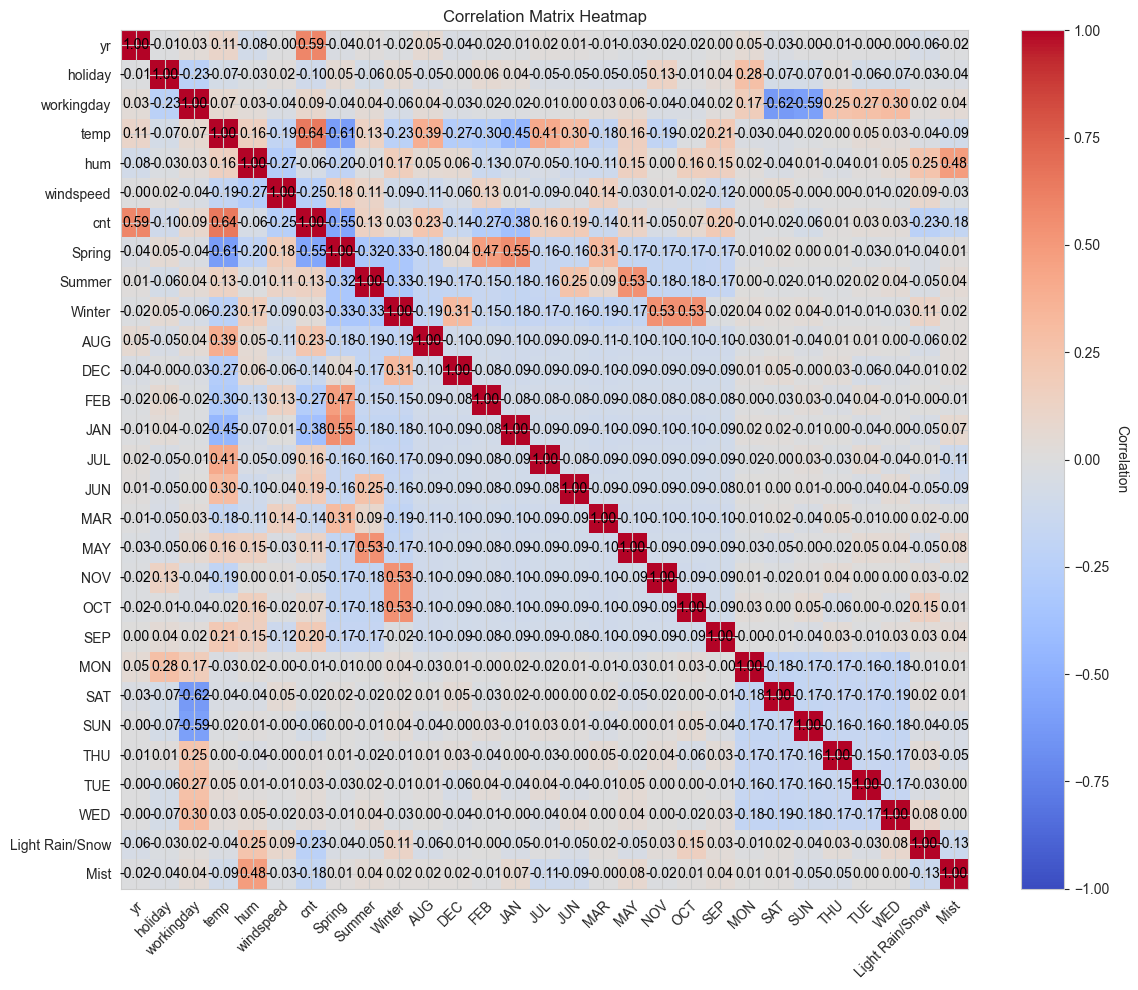

In [200]:
# Let's check the correlation coefficients to see which variables are highly correlated

# plt.figure(figsize = (16, 10))
# sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
# plt.show()

corr_matrix = df_train.corr()
 
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 10))
 
# Create the heatmap
im = ax.imshow(corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
 
# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Correlation", rotation=-90, va="bottom")
 
# Set ticks and labels
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns)
ax.set_yticklabels(corr_matrix.columns)
 
# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
 
# Loop over data dimensions and create text annotations
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = ax.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}",
                       ha="center", va="center", color="black")
 
# Set title
ax.set_title("Correlation Matrix Heatmap")
 
# Adjust layout and display
fig.tight_layout()
plt.show()

### Inferrence:
- Highest correlation with `cnt` is seen in `temp` followed by `yr`.

### Dividing into X and y sets for the model building.

In [204]:
y_train = df_train.pop('cnt')
X_train = df_train

# shape of X_train and y_train
X_train.shape, y_train.shape

((510, 28), (510,))

# Step 5: Building a Linear Model

## **`Model 1 - using temp`**

In [208]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

# Check the parameters obtained
lr.params

const    0.169798
temp     0.639952
dtype: float64

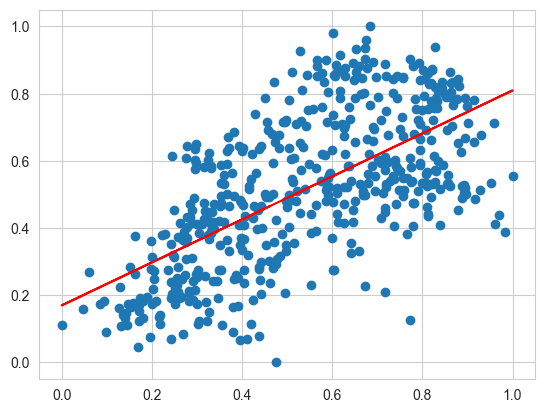

In [210]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.169798 + 0.639952*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [212]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Sun, 22 Sep 2024   Prob (F-statistic):           5.80e-61
Time:                        01:20:50   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

**INFERENCE : R-squared is .414 which means `41%` of the variance in the `cnt` quantity is explained by `temp`.**

---
## **`Model 2 - using temp and yr`**

In [216]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['temp', 'yr']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

# Check the parameters obtained
lr.params

const    0.079628
temp     0.583559
yr       0.237213
dtype: float64

In [218]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     564.9
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          9.25e-130
Time:                        01:20:51   Log-Likelihood:                 337.38
No. Observations:                 510   AIC:                            -668.8
Df Residuals:                     507   BIC:                            -656.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0796      0.015      5.331      0.0

**INFERENCE : R-squared is 0.690 which means `69%` of the variance in the `cnt` quantity is explained by `temp` and `yr` together.**

---
## **`Model 3 - Adding all the variables to the model`**

In [222]:
# This function is used to build the model and display the summary of the model
def build_model(X, y):
    X = sm.add_constant(X) # Adding a constant
    lm = sm.OLS(y, X).fit() # fitting the model
    print(lm.summary()) # model summary
    return lm # return model

In [224]:
# Build Model Number 1
lr_1 = build_model(X_train, y_train)

# Print summary of Model Number 1
lr_1.params

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          8.74e-182
Time:                        01:20:59   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2451      0.035     

const              0.245085
yr                 0.232116
holiday            0.009959
workingday         0.096884
temp               0.450562
hum               -0.151340
windspeed         -0.186453
Spring            -0.048159
Summer             0.038725
Winter             0.105847
AUG                0.014404
DEC               -0.045586
FEB               -0.032282
JAN               -0.062777
JUL               -0.040350
JUN               -0.002972
MAR                0.001045
MAY                0.023940
NOV               -0.041851
OCT                0.007534
SEP                0.081060
MON               -0.020907
SAT                0.096389
SUN                0.041853
THU               -0.009237
TUE               -0.018890
WED               -0.005388
Light Rain/Snow   -0.257443
Mist              -0.061066
dtype: float64

### Observation :
- **R-squared is now .853 which means 85% of the variance in the count quantity is explained with all the variables.**
- **Looking at the `p-values`, it looks like some of the variables aren't really significant (in the presence of other variables).**
- **We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information.**

---
## **`Applying Recursive Feature Elimination (RFE)`**

We have manually selected features for our model by analyzing R-squared values and best-fit lines. To automate this process and identify the most optimal feature set, we will employ `Recursive Feature Elimination (RFE)` in conjunction with `Variance Inflation Factor (VIF)`. RFE will iteratively remove features that contribute least to the model's performance, while VIF will help identify and eliminate multicollinear features. This combined approach aims to create a parsimonious model with the best possible predictive power.

In [228]:
lm = LinearRegression() #creating the RFE object.
lm.fit(X_train, y_train) 

rfe = RFE(lm, n_features_to_select = 15) #setting feature selection variables to 15.
rfe = rfe.fit(X_train, y_train) #fitting rfe object on our training dataset.

In [230]:
# Checking the elements selected in top 15, and the ones rejected in a list.

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('AUG', False, 12),
 ('DEC', False, 4),
 ('FEB', False, 5),
 ('JAN', False, 2),
 ('JUL', True, 1),
 ('JUN', False, 9),
 ('MAR', False, 14),
 ('MAY', False, 6),
 ('NOV', False, 3),
 ('OCT', False, 13),
 ('SEP', True, 1),
 ('MON', False, 7),
 ('SAT', True, 1),
 ('SUN', True, 1),
 ('THU', False, 10),
 ('TUE', False, 8),
 ('WED', False, 11),
 ('Light Rain/Snow', True, 1),
 ('Mist', True, 1)]

In [232]:
# List of columns selected via RFE

columns_selected_by_RFE = X_train.columns[rfe.support_]
print(columns_selected_by_RFE)
print("Length of items selected : ", len(columns_selected_by_RFE))

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'JUL', 'SEP', 'SAT', 'SUN', 'Light Rain/Snow',
       'Mist'],
      dtype='object')
Length of items selected :  15


In [234]:
# List of columns rejected via RFE

print(X_train.columns[~rfe.support_])
print("Length of items rejected : ", len(X_train.columns[~rfe.support_]))

Index(['AUG', 'DEC', 'FEB', 'JAN', 'JUN', 'MAR', 'MAY', 'NOV', 'OCT', 'MON',
       'THU', 'TUE', 'WED'],
      dtype='object')
Length of items rejected :  13


In [236]:
# Creating training set with RFE selected variables.
X_train = X_train[columns_selected_by_RFE]

# Building the model using RFE variables.
lr_2 = build_model(X_train, y_train)

# Printing summary of Model built. 
lr_2.params

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          1.13e-191
Time:                        01:21:18   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1989      0.028     

const              0.198900
yr                 0.229738
holiday           -0.018955
workingday         0.083695
temp               0.527819
hum               -0.159467
windspeed         -0.180601
Spring            -0.055434
Summer             0.052613
Winter             0.100294
JUL               -0.054881
SEP                0.081773
SAT                0.093682
SUN                0.040479
Light Rain/Snow   -0.246332
Mist              -0.057847
dtype: float64

---
### Checking VIF

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [239]:
# This function is used to check the VIF values of the features
def checkVIF(X):
    vif = pd.DataFrame() # Create a dataframe to store the VIF values
    vif['Features'] = X.columns # Store the column names in the dataframe i.e. the feature names
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] # Calculate the VIF values for each feature
    vif['VIF'] = round(vif['VIF'], 2) # Round off the VIF values to 2 decimal places
    vif = vif.sort_values(by = "VIF", ascending = False) # Sort the VIF values in descending order
    return(vif)

In [241]:
checkVIF(X_train)

,Features,VIF
2,workingday,50.69
11,SAT,12.20
12,SUN,11.79
6,Spring,5.02
3,temp,3.62
8,Winter,3.49
1,holiday,2.91
7,Summer,2.61
4,hum,1.91
14,Mist,1.57


We generally want a `VIF` that is `less than 5`. So there are clearly some variables we need to drop.

## Variable Selection Guidelines

Based on VIF (Variance Inflation Factor) and p-values, we can use the following guidelines to decide which variables to include or exclude from our model:

1. **High p-value, high VIF**: Definitely drop these variables
   - These variables are likely not significant and show high multicollinearity

2. **High p-value, low VIF**: Remove these first
   - After removal, rebuild the model and check VIF again
   - These variables are not significant but don't show high multicollinearity

3. **Low p-value, high VIF**: Consider removing these later
   - These variables are significant but show high multicollinearity
   - Evaluate their importance to the model before deciding

4. **Low p-value, low VIF**: Keep these variables
   - These variables are significant and don't show high multicollinearity

### Dropping the `workingday` variable, since it has very high `VIF`

In [246]:
X_train = X_train.drop(['workingday'], axis=1)

In [248]:
# Building 3rd linear regression modal
lr_3 = build_model(X_train, y_train)

# Print summary of Model Number 3
lr_3.params

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          1.13e-191
Time:                        01:21:30   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2826      0.034     

const              0.282595
yr                 0.229738
holiday           -0.102650
temp               0.527819
hum               -0.159467
windspeed         -0.180601
Spring            -0.055434
Summer             0.052613
Winter             0.100294
JUL               -0.054881
SEP                0.081773
SAT                0.009987
SUN               -0.043216
Light Rain/Snow   -0.246332
Mist              -0.057847
dtype: float64

In [250]:
checkVIF(X_train)

,Features,VIF
3,hum,28.28
2,temp,16.06
4,windspeed,4.68
5,Spring,4.03
7,Winter,3.37
6,Summer,2.78
13,Mist,2.30
0,yr,2.08
8,JUL,1.59
9,SEP,1.39


### Dropping the `hum` variable, which has highest `VIF` value of `28.28` and updating the model

In [253]:
X_train = X_train.drop(['hum'], axis=1)

In [255]:
# Building 4th linear regression modal
lr_4 = build_model(X_train, y_train)

# Print summary of Model Number 4
lr_4.params

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          5.73e-189
Time:                        01:22:23   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2039      0.029     

const              0.203927
yr                 0.233626
holiday           -0.103407
temp               0.492017
windspeed         -0.149124
Spring            -0.065288
Summer             0.046496
Winter             0.085870
JUL               -0.049971
SEP                0.075781
SAT                0.011749
SUN               -0.046259
Light Rain/Snow   -0.290444
Mist              -0.083515
dtype: float64

In [257]:
checkVIF(X_train)

,Features,VIF
2,temp,5.18
3,windspeed,4.62
5,Summer,2.23
4,Spring,2.13
0,yr,2.07
6,Winter,1.84
7,JUL,1.59
12,Mist,1.55
8,SEP,1.34
9,SAT,1.23


### Dropping `SAT` variable, which has very high `p-value` of `0.300` and updating the model

In [260]:
X_train = X_train.drop(['SAT'], axis=1)

In [262]:
# Building 5th linear regression modal
lr_5 = build_model(X_train, y_train)

# Print summary of Model Number 5
lr_5.params

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.8
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          6.45e-190
Time:                        01:23:01   Log-Likelihood:                 508.10
No. Observations:                 510   AIC:                            -990.2
Df Residuals:                     497   BIC:                            -935.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2063      0.029     

const              0.206281
yr                 0.233369
holiday           -0.105739
temp               0.491162
windspeed         -0.147913
Spring            -0.065308
Summer             0.046369
Winter             0.086067
JUL               -0.049569
SEP                0.075863
SUN               -0.048479
Light Rain/Snow   -0.290409
Mist              -0.083534
dtype: float64

In [264]:
checkVIF(X_train)

,Features,VIF
2,temp,5.14
3,windspeed,4.60
5,Summer,2.22
4,Spring,2.11
0,yr,2.07
6,Winter,1.82
7,JUL,1.59
11,Mist,1.55
8,SEP,1.34
9,SUN,1.18


### Inference :
- Now as you can see, the `VIFs` and `p-values` both are within an acceptable range. Hence, we finalise `lr_5` as the final model to proceed with the future prdeictions.

---
## Step 6: Residual Analysis of the train data

In [268]:
X_train_lm = sm.add_constant(X_train)
y_train_pred = lr_5.predict(X_train_lm)

# Residual
res = (y_train - y_train_pred)

Text(0.5, 0, 'Errors')

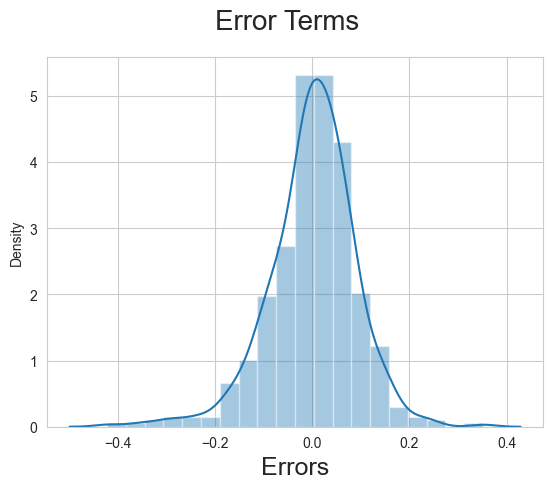

In [270]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions Using the Final Model

In [273]:
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,AUG,DEC,FEB,JAN,JUL,JUN,MAR,MAY,NOV,OCT,SEP,MON,SAT,SUN,THU,TUE,WED,Light Rain/Snow,Mist
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
299,0,0,1,19.270000,81.2917,13.250121,2659,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,0,0,1,29.315000,30.5000,19.583229,4968,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


#### Applying the scaling on the test sets

In [276]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [278]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,AUG,DEC,FEB,JAN,JUL,JUN,MAR,MAY,NOV,OCT,SEP,MON,SAT,SUN,THU,TUE,WED,Light Rain/Snow,Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [281]:
y_test = df_test.pop('cnt')
X_test = df_test

In [283]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,Spring,Summer,Winter,AUG,DEC,FEB,JAN,JUL,JUN,MAR,MAY,NOV,OCT,SEP,MON,SAT,SUN,THU,TUE,WED,Light Rain/Snow,Mist
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [285]:
X_train.head()

,yr,holiday,temp,windspeed,Spring,Summer,Winter,JUL,SEP,SUN,Light Rain/Snow,Mist
653,1,0,0.509887,0.300794,0,0,1,0,0,0,0,0
576,1,0,0.815169,0.264686,0,0,0,1,0,0,0,0
426,1,0,0.442393,0.255342,1,0,0,0,0,0,0,1
728,1,0,0.245101,0.663106,1,0,0,0,0,1,0,0
482,1,0,0.395666,0.188475,0,1,0,0,0,0,0,1


In [287]:
# Printing feature variables
X_train.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'Spring', 'Summer', 'Winter',
       'JUL', 'SEP', 'SUN', 'Light Rain/Snow', 'Mist'],
      dtype='object')

In [289]:
# Creating X_test dataset based on the feature variables using RFE
X_test_m5 = X_test[X_train.columns]

# Adding constant variable to test dataframe
X_test_m5 = sm.add_constant(X_test_m5)

In [291]:
X_test_m5.head()

,const,yr,holiday,temp,windspeed,Spring,Summer,Winter,JUL,SEP,SUN,Light Rain/Snow,Mist
184,1.0,0,1,0.831783,0.084219,0,0,0,1,0,0,0,1
535,1.0,1,0,0.901354,0.153728,0,1,0,0,0,0,0,0
299,1.0,0,0,0.511964,0.334206,0,0,1,0,0,0,0,1
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,0,1,0,0,0,0,0,0


In [293]:
# Making predictions using the thirteenth model

y_test_pred = lr_5.predict(X_test_m5)

---
## Step 7: Model Evaluation

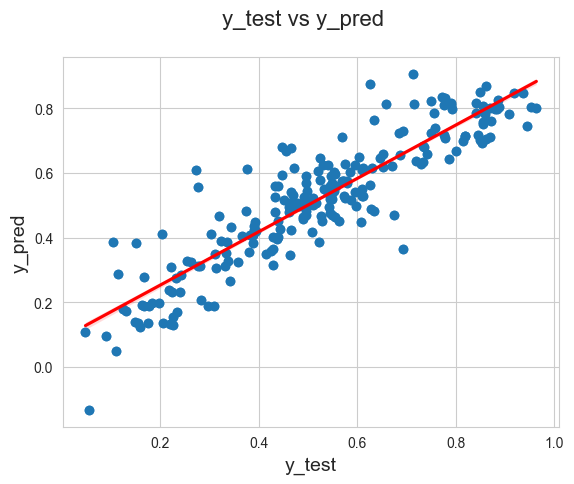

In [296]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=52, fit_reg=True, line_kws={"color": "red"})
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 16)               
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 14) 
plt.show()

### Variable names and there (coefficient values/weights) for the final equation of the best fitted line :

In [300]:
param = pd.DataFrame(lr_5.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,13))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
3,temp,0.491162
1,yr,0.233369
0,const,0.206281
7,Winter,0.086067
9,SEP,0.075863
6,Summer,0.046369
10,SUN,-0.048479
8,JUL,-0.049569
5,Spring,-0.065308


### We can see that the equation of our best fitted line is:

$ cnt = 0.220189 + 0.472685 \times temp + 0.234538 \times yr + 0.076865 \times Winter + 0.071696 \times SEP + 0.043518 \times Summer - 0.039663 \times JAN - 0.045396 \times SUN - 0.046808 \times JUL - 0.062282 \times Spring - 0.080682 \times Mist - 0.105739 \times holiday - 0.157000 \times windspeed - 0.286909 \times LightRain/Snow $


### Looking for patterns in the residuals (`Homoscedasticity`)

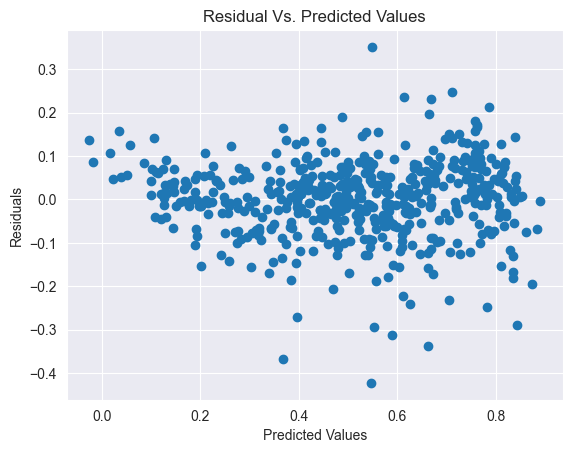

In [304]:
plt.figure()
sns.set_style("darkgrid")
plt.scatter(y_train_pred,res)
plt.title('Residual Vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

### `Mean Squared Error (MSE)`

In [307]:
# Finding out the mean squared error 
train_mse = (mean_squared_error(y_true=y_train, y_pred=y_train_pred))
test_mse = (mean_squared_error(y_true=y_test, y_pred=y_test_pred))
print('Mean squared error of the train set is', train_mse)
print('Mean squared error of the test set is', test_mse)

Mean squared error of the train set is 0.0079832245524601
Mean squared error of the test set is 0.009150308538119057


**Since our model's mean squared error is almost 0, it implies that our model accurately predicts the variance between in both the test and train datasets**

### `r2_score`

In [311]:
# r2 score of the training set
r2_train = r2_score(y_true=y_train, y_pred=y_train_pred)
print('r2 score on the train set is', r2_train)

# r2 score of the test set
r2_test = r2_score(y_true=y_test, y_pred=y_test_pred)
print('r2 score on the test set is', r2_test)

r2 score on the train set is 0.8414231028072952
r2 score on the test set is 0.8073449238053555


# Final Conclusion

### 1. Model Performance
--------------------
- Strong predictive power: Explains ~84% of variance in bike sharing demand
- Low mean squared errors: Train (0.0080), Test (0.0092)
- Consistent performance between train and test sets indicates good generalization
- R-squared scores: Train (0.8414), Test (0.8073)

### 2. Key Factors and Insights
--------------
#### Most influential factors:
    * Temperature (coef: 0.491162): A strong positive impact on bike rentals. As temperature rises, bike rentals tend to increase significantly.
    * Year trend (coef: 0.233369): The upward trend in bike rentals over time suggests growing adoption of the service.

#### Negative impacts:
    * Light Rain/Snow (coef: -0.290409): Rain or snow has the most significant negative impact on bike rentals, leading to reduced usage.
    * Holiday (coef: -0.105739): Bike rentals tend to drop on holidays, potentially due to fewer commuters or a change in travel habits.
    * Windspeed (coef: -0.147913): Higher wind speeds negatively affect rentals, likely because of reduced comfort and safety.
    * Mist (coef: -0.083534): Misty conditions also reduce rentals, possibly due to reduced visibility or unpleasant conditions.weather.

#### Seasonal effects:
    * Winter (coef: 0.086067): Winter has a positive but modest impact, suggesting increased demand compared to other seasons.
    * Summer (coef: 0.046369): Summer still shows a mild positive impact, though less influential than temperature.
    * Spring (coef: -0.065308): Spring has a small negative effect, possibly due to unpredictable weather.

#### Monthly patterns:
    * Higher demand in September (coef: 0.075863): September stands out for increased rentals.
    * Lower demand in July (coef: -0.049569): July shows a slight drop in rentals, likely due to extreme heat or vacation periods.
 
#### Day of week effect:
    * Sunday (coef: -0.048479) shows a slight negative impact, indicating that rental demand tends to drop on Sundays compared to weekdays, possibly because of reduced commuting.

#### Holiday Effect:
    * The inclusion of Holiday (coef: -0.105739) shows a notable reduction in bike rentals during holidays.
    * This may indicate that people prefer other forms of transportation or are less likely to commute on holidays, hence the drop in demand.

### 3. Practical Implications and Recommendations
-------------------------
- Weather and seasonal factors crucial for demand prediction
- BoomBikes popularity is growing year-over-year (2019 > 2018)
- Operational adjustments:
    * Increase capacity during favorable weather conditions
    * Implement strategies for low-demand periods (e.g., rainy days)
- Marketing strategies:
    * Aggressive marketing in summer and spring
    * Strong push in the first 6 months of the year
    * Develop incentives for less favorable weather conditions
- Customer retention:
    * Analyze and implement strategies to retain repeat customers
    * Capitalize on growing popularity and exposure

### 4. Model Reliability
--------------------
- Close alignment of train and test performance metrics
- Model likely to perform well on new, unseen data

### Summary:
This model provides a reliable tool for predicting bike sharing demand, accounting for various temporal, environmental, and operational factors. It offers valuable insights for operational planning, resource allocation, and marketing strategies in the bike sharing system. The model highlights the importance of weather conditions, seasonal trends, and yearly growth, providing a solid foundation for business decision-making and expansion strategies for BoomBikes.